In [1]:
import pandas as pd

crop_df = pd.read_csv("Crop_recommendation.csv")
crop_df.sample(n=5, random_state=42)

,N,P,K,temperature,humidity,ph,rainfall,label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple


In [2]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [33]:
import pandas as pd

def analyze_dataframe(df):
    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Describe numerical columns
    numerical_description = df[numerical_columns].describe()

    # Value counts for categorical columns
    categorical_counts = df[categorical_columns].apply(lambda x: x.value_counts()).transpose()

    return numerical_description, categorical_counts

# Example usage
crop_df = pd.read_csv("Crop_recommendation.csv")
numerical_summary, categorical_summary = analyze_dataframe(crop_df)

print("Numerical Columns Description:")
print(numerical_summary)

print("\nCategorical Columns Value Counts:")
print(categorical_summary)


Numerical Columns Description:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.56011

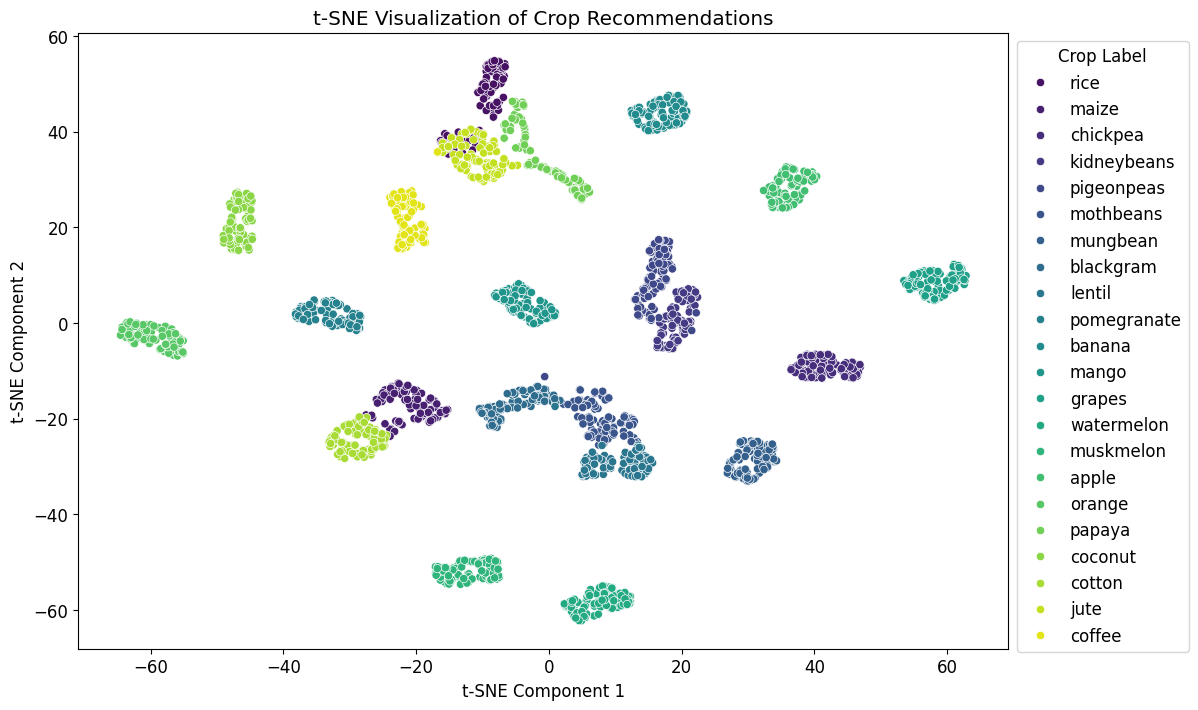

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

crop_df = pd.read_csv("Crop_recommendation.csv")
plt.rcParams['figure.figsize'] = (12,8)

# Extract features and labels
X = crop_df.drop(columns=['label'])
y = crop_df['label']

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Visualize t-SNE results colored by crop labels
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Crop Recommendations')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Crop Label', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [36]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

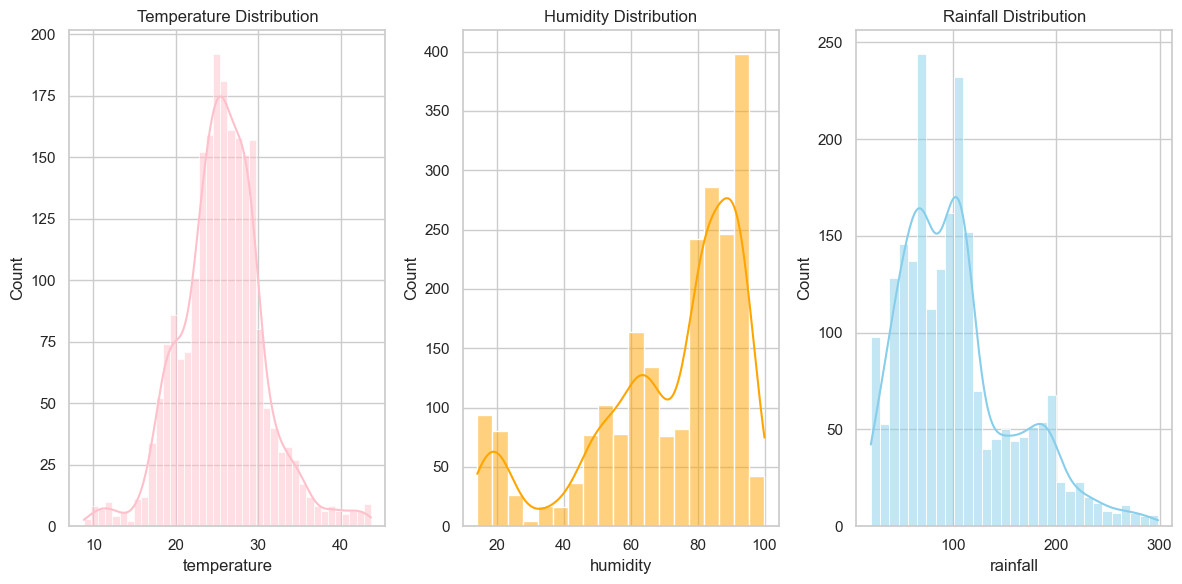

In [39]:
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(1,3, figsize = (12,6))

sns.histplot(crop_df['temperature'], kde=True, color= 'pink', ax = axes[0])
axes[0].set_title("Temperature Distribution")
sns.histplot(crop_df['humidity'], kde=True, color= 'orange', ax = axes[1])
axes[1].set_title("Humidity Distribution")
sns.histplot(crop_df['rainfall'], kde=True,  color= 'skyblue', ax = axes[2])
axes[2].set_title("Rainfall Distribution")

plt.tight_layout()
plt.show()



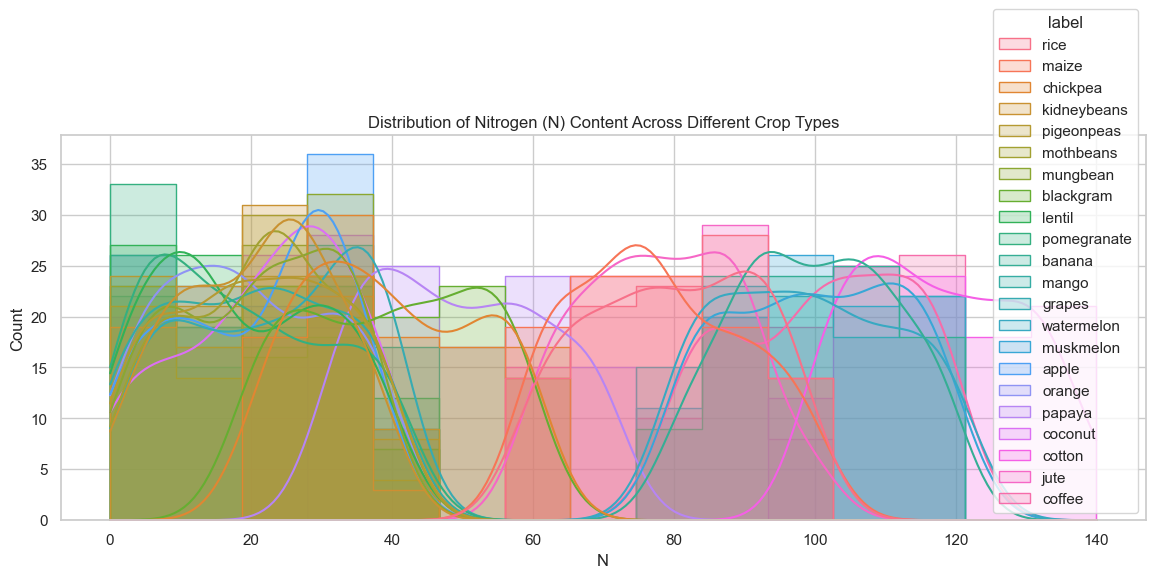

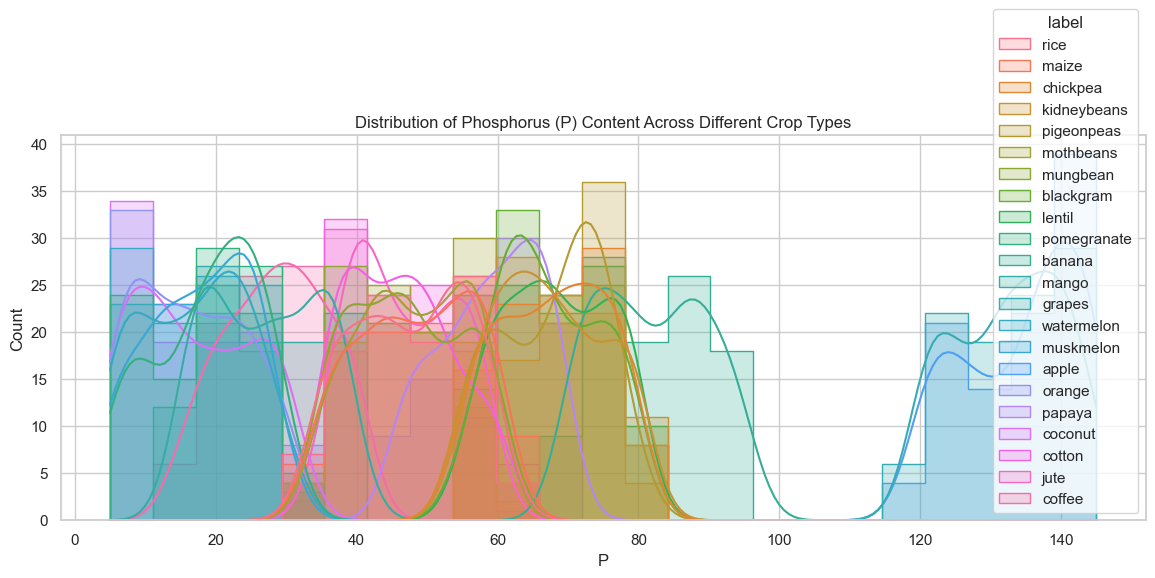

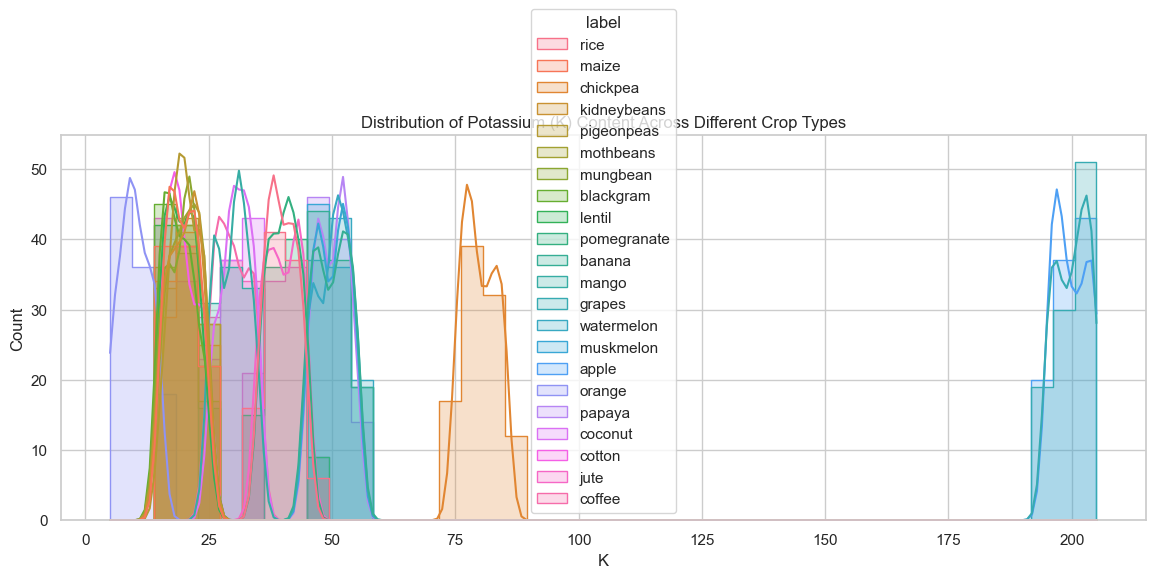

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for Nitrogen (N)
plt.figure(figsize=(14, 5))
sns.histplot(data=crop_df, x='N', hue='label', kde=True, element='step')
plt.title('Distribution of Nitrogen (N) Content Across Different Crop Types')
plt.show()

# Plot distributions for Phosphorus (P)
plt.figure(figsize=(14, 5))
sns.histplot(data=crop_df, x='P', hue='label', kde=True, element='step')
plt.title('Distribution of Phosphorus (P) Content Across Different Crop Types')
plt.show()

# Plot distributions for Potassium (K)
plt.figure(figsize=(14, 5))
sns.histplot(data=crop_df, x='K', hue='label', kde=True, element='step')
plt.title('Distribution of Potassium (K) Content Across Different Crop Types')
plt.show()


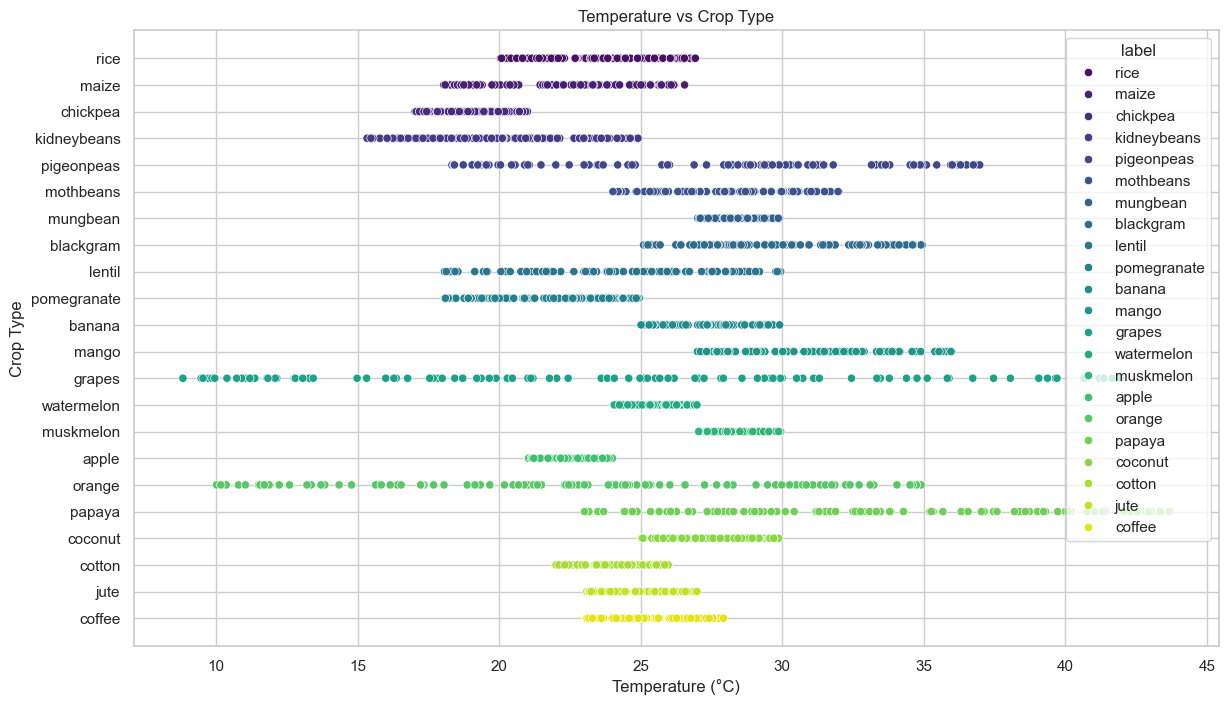

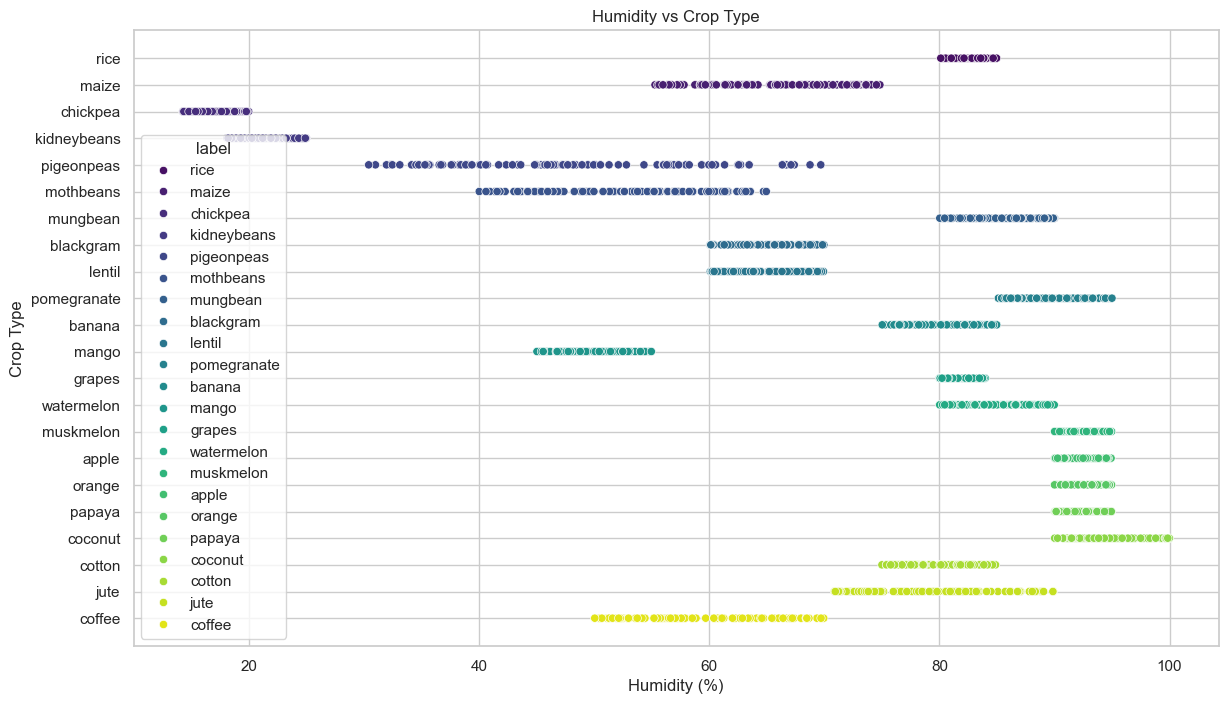

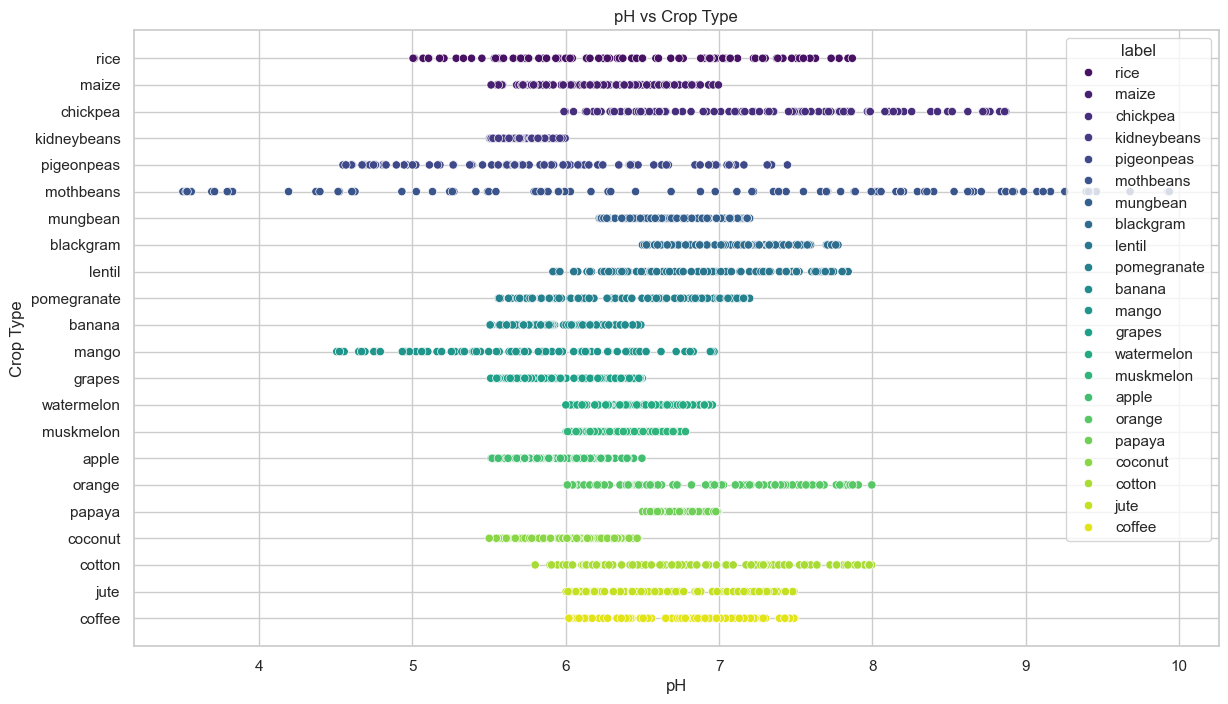

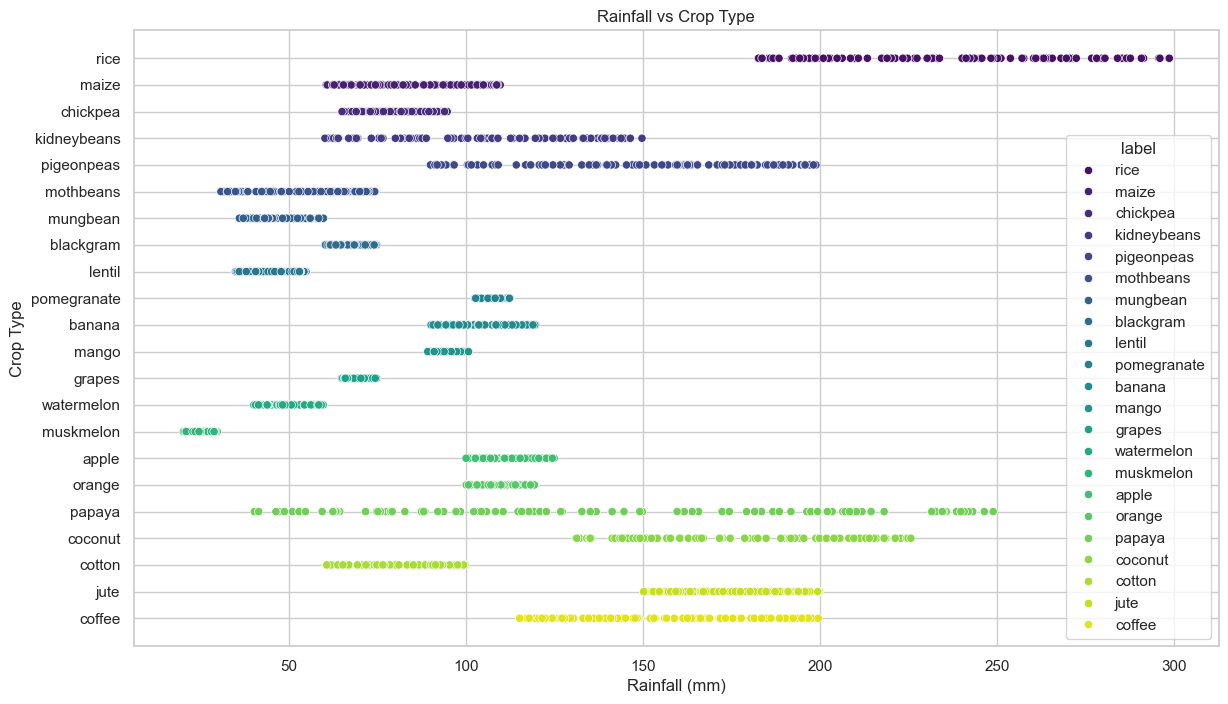

In [46]:
# Scatter plot for Temperature vs Crop Type
plt.figure(figsize=(14, 8))
sns.scatterplot(data=crop_df, x='temperature', y='label', hue='label', palette='viridis')
plt.title('Temperature vs Crop Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Type')
plt.show()

# Scatter plot for Humidity vs Crop Type
plt.figure(figsize=(14, 8))
sns.scatterplot(data=crop_df, x='humidity', y='label', hue='label', palette='viridis')
plt.title('Humidity vs Crop Type')
plt.xlabel('Humidity (%)')
plt.ylabel('Crop Type')
plt.show()

# Scatter plot for pH vs Crop Type
plt.figure(figsize=(14, 8))
sns.scatterplot(data=crop_df, x='ph', y='label', hue='label', palette='viridis')
plt.title('pH vs Crop Type')
plt.xlabel('pH')
plt.ylabel('Crop Type')
plt.show()

# Scatter plot for Rainfall vs Crop Type
plt.figure(figsize=(14, 8))
sns.scatterplot(data=crop_df, x='rainfall', y='label', hue='label', palette='viridis')
plt.title('Rainfall vs Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Type')
plt.show()
